In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from urllib.request import urlretrieve
_=urlretrieve('https://raw.githubusercontent.com/alsinmr/'+\
              'ConferenceExamples/refs/heads/master/PraktikumPhysik/heights.txt',
             'heights.txt')

gr=[]
with open('heights.txt','r') as f:
    for line in f:
        gr.append(float(line.strip()))
gr=np.array(gr)

In [4]:
mw=gr.sum()/len(gr)
sta=np.sqrt(1/(len(gr)-1)*((gr-mw)**2).sum())
stf=sta/np.sqrt(len(gr))

# Verteilung

Text(173.70251880000004, 600, '$\\sigma$ = 4.83 cm')

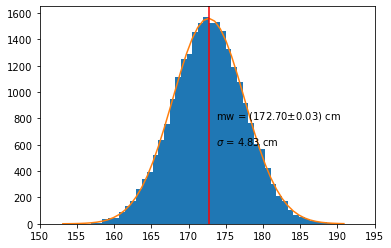

In [5]:
ax=plt.subplots()[1]
zahl,bins,_=ax.hist(gr,bins=50)
w=bins[1]-bins[0]
ax.plot(bins,np.exp(-(bins-mw)**2/(2*sta**2))*w*len(gr)/np.sqrt(2*np.pi*sta**2))
ax.set_ylim(ax.get_ylim())
ax.set_xlim([150,195])
ax.plot([mw,mw],ax.get_ylim(),color='red')
ax.text(mw+1,800,rf'mw = ({mw:.2f}$\pm${stf:.2f}) cm')
ax.text(mw+1,600,rf'$\sigma$ = {sta:.2f} cm')

### Wie genau ist ein ausgerechnete Mittelwert mit *N* Messungen?

In [17]:
N=100
index=[]
for _ in range(N):   #Wählen N Größe nach dem Zufallprinzip aus
    i=np.random.randint(len(gr))
    while i in index:
        i=np.random.randint(len(gr))
    index.append(i)
gr0=gr[np.array(index)]

In [13]:
mw0=gr0.sum()/len(gr0)
sta0=np.sqrt(1/(len(gr0)-1)*((gr0-mw0)**2).sum())
stf0=sta0/np.sqrt(len(gr0))

Text(173.72299600000002, 632.3301372143882, '$\\sigma$ = 4.85 cm')

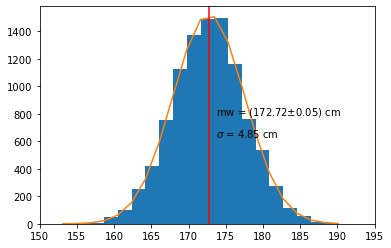

In [14]:
ax=plt.subplots()[1]
zahl,bins,_=ax.hist(gr0,bins=20)
w=bins[1]-bins[0]
ax.plot(bins,np.exp(-(bins-mw0)**2/(2*sta0**2))*w*len(gr0)/np.sqrt(2*np.pi*sta0**2))
ax.set_xlim([150,195])
ax.set_ylim(ax.get_ylim())
ax.plot([mw0,mw0],ax.get_ylim(),color='red')
ax.text(mw0+1,ax.get_ylim()[1]*.5,rf'mw = ({mw0:.2f}$\pm${stf0:.2f}) cm')
ax.text(mw0+1,ax.get_ylim()[1]*.4,rf'$\sigma$ = {sta0:.2f} cm')